In [ ]:
import tensorflow as tf

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


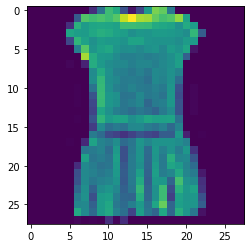

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
#linewidth =  The number of characters per line for the purpose of inserting line breaks (default 75)
import matplotlib.pyplot as plt
plt.imshow(X_train[3])

In [ ]:
print(X_train[3])

[[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194 102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179 186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152 148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140 137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131 131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119 140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117 127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119 127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 156 129 112 110 102 112 100 121 117 129 11

In [ ]:
# Normalize the data
# 28*28 = 256
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[3])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.12941176 0.37647059 0.68627451 0.61176471 0.25098039 0.05490196 0.21176471 0.5372549  0.8
  0.76078431 0.4        0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.28627451 0.72941176 0.69411765 0.71764706 0.68627451 0.7372549  0.90980392 1.         0.8745098  0.85882353 0.76078431
  0.70196078 0.72941176 0.83529412 0.57254902 0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.1372549  0.63921569 0.54901961 0.58823529 0.59607843 0.58823529 0.57254902 0.68627451 0.68627451 0.67843137 0.67058824 0.61176471
  0.59607843 0.58039216 0.50588235 0.61176471 0.54901961 0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.58823529 

In [ ]:
from keras.utils import to_categorical
to_categorical(3, num_classes=10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
# 1) Define a model - layers
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense, Flatten
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2) Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4266 - accuracy: 0.6166 - val_loss: 1.0109 - val_accuracy: 0.7201
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8436 - accuracy: 0.7553 - val_loss: 0.7552 - val_accuracy: 0.7650
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6832 - accuracy: 0.7804 - val_loss: 0.6576 - val_accuracy: 0.7766
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6111 - accuracy: 0.7959 - val_loss: 0.6134 - val_accuracy: 0.7852
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5704 - accuracy: 0.8062 - val_loss: 0.5905 - val_accuracy: 0.7909


In [ ]:
# 4) Prediction
Classification = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
Classification

array([[3.3889493e-04, 3.5577021e-03, 6.3638709e-04, ..., 1.0541321e-01, 2.9565962e-03, 7.4850696e-01],
       [3.2388172e-03, 1.3350612e-04, 6.7452812e-01, ..., 2.2459067e-06, 2.5988132e-02, 7.2905395e-06],
       [3.8119769e-04, 9.4107366e-01, 1.6175659e-04, ..., 7.0008886e-04, 2.7163366e-03, 1.7160827e-02],
       ...,
       [6.6155130e-01, 4.5647142e-03, 2.2028977e-02, ..., 9.7620236e-03, 1.5359716e-02, 2.5317163e-04],
       [2.6951404e-04, 9.4384664e-01, 1.5898827e-04, ..., 4.9154437e-04, 2.3099270e-03, 1.7519236e-02],
       [1.0643709e-03, 7.1247021e-05, 4.7093830e-03, ..., 6.2149502e-02, 5.1488686e-02, 1.2480129e-02]], dtype=float32)

In [ ]:
# Evaluating model
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5905 - accuracy: 0.7909


[0.5905346870422363, 0.7908999919891357]

In [ ]:
predictions = np.argmax(Classification, axis=1)
#The np. argmax function simply returns the index of the maximum value in the array
print(predictions)

[9 2 1 ... 0 1 5]


In [ ]:
y_pred =model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis = 1)

313/313 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1000
           1       0.97      0.93      0.95      1000
           2       0.66      0.66      0.66      1000
           3       0.75      0.89      0.81      1000
           4       0.60      0.78      0.68      1000
           5       0.94      0.90      0.92      1000
           6       0.47      0.23      0.31      1000
           7       0.89      0.91      0.90      1000
           8       0.96      0.89      0.92      1000
           9       0.91      0.94      0.92      1000

    accuracy                           0.79     10000
   macro avg       0.78      0.79      0.78     10000
weighted avg       0.78      0.79      0.78     10000

[[788   3  12  89   7   1  91   0   9   0]
 [  1 926   3  55  10   0   2   0   3   0]
 [ 17   1 658  21 214   0  83   0   6   0]
 [ 37  14   9 886  24   0  27   0   3   0]
 [  2   2 125  54 780   0  34   0   3   0]
 [  0   0   0   1   1 897 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


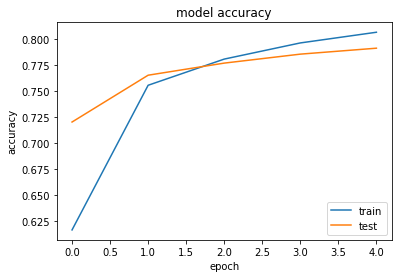

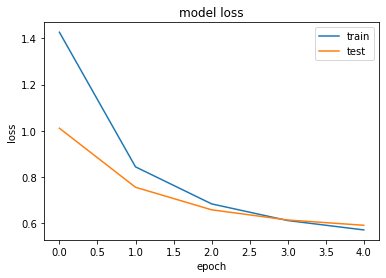

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
#1- from figure 1 as number of epochs increase the accuracy is increaseing
#2- from figure 2 as number of epochs increase the loss is decreaseing